[Source on research.google.com](https://colab.research.google.com/github/google/eng-edu/blob/master/ml/cc/exercises/linear_regression_with_synthetic_data.ipynb)

In [1]:
# Due to some numpy warnings I had to downgrade numpy to 1.16.1
# https://github.com/scikit-image/scikit-image/issues/3655

In [2]:
import tensorflow as tf
import pandas as pd
from matplotlib import pyplot as plt

### Build model function

In [3]:
# Function that builds an empty model
def build_model(my_learning_rate):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential. 
  # A sequential model contains one or more layers.
  # Docs: https://keras.io/getting-started/sequential-model-guide/
    
  model = tf.keras.models.Sequential()

  # Describe the topography of the model.
  # The topography of a simple linear regression model is a single node in a single layer  
  # Docs: https://keras.io/layers/core/
    
  model.add(tf.keras.layers.Dense(units=1, 
                                  input_shape=(1,)))

  # Compile the model topography into code that 
  # TensorFlow can efficiently execute. 
  # Configure training to minimize the model's mean squared error. 
  # Docs: https://keras.io/models/model/#compile
  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model 

### Train model function

In [4]:
def train_model(model, feature, label, epochs, batch_size):
  """Train the model by feeding it data."""

  # Feed the feature values and the label values to the 
  # model. The model will train for the specified number 
  # of epochs, gradually learning how the feature values
  # relate to the label values. 
  history = model.fit(x=feature,
                      y=label,
                      batch_size=None,
                      epochs=epochs)

  # Gather the trained model's weight and bias.
  trained_weights = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  # The list of epochs is stored separately from the 
  # rest of history.
  epochs = history.epoch
  
  # Gather the history (a snapshot) of each epoch.
  hist = pd.DataFrame(history.history)

  # Specifically gather the model's root mean 
  # squared error at each epoch. 
  rmse = hist["root_mean_squared_error"]

  return trained_weights, trained_bias, epochs, rmse

print("Defined create_model and train_model")

Defined create_model and train_model


### Plotting functions

In [5]:
# Define the plotting functions
def plot_the_model(trained_weight, trained_bias, feature, label):
  """Plot the trained model against the training feature and label."""

  # Label the axes.
  plt.xlabel("feature")
  plt.ylabel("label")

  # Plot the feature values vs. label values.
  plt.scatter(feature, label)

  # Create a red line representing the model. The red line starts
  # at coordinates (x0, y0) and ends at coordinates (x1, y1).
  x0 = 0
  y0 = trained_bias
  x1 = my_feature[-1]
  y1 = trained_bias + (trained_weight * x1)
  plt.plot([x0, x1], [y0, y1], c='r')

  # Render the scatter plot and the red line.
  plt.show()

def plot_the_loss_curve(epochs, rmse):
  """Plot the loss curve, which shows loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()

print("Defined the plot_the_model and plot_the_loss_curve functions.")

Defined the plot_the_model and plot_the_loss_curve functions.


### Define the dataset

In [6]:
my_feature = ([1.0, 2.0,  3.0,  4.0,  5.0,  6.0,  7.0,  8.0,  9.0, 10.0, 11.0, 12.0])
my_label   = ([5.0, 8.8,  9.6, 14.2, 18.8, 19.5, 21.4, 26.8, 28.9, 32.0, 33.8, 38.2])

### Initialize hyperparameters

In [7]:
learning_rate = 0.01
epochs = 30
my_batch_size = 12

### Build and train

Train on 12 samples
Epoch 1/30
12/12 [==============================] - 0s 35ms/sample - loss: 555.7509 - root_mean_squared_error: 23.5744
Epoch 2/30
12/12 [==============================] - 0s 2ms/sample - loss: 543.5200 - root_mean_squared_error: 23.3135
Epoch 3/30
12/12 [==============================] - 0s 1ms/sample - loss: 534.7784 - root_mean_squared_error: 23.1253
Epoch 4/30
12/12 [==============================] - 0s 1ms/sample - loss: 527.5366 - root_mean_squared_error: 22.9682
Epoch 5/30
12/12 [==============================] - 0s 2ms/sample - loss: 521.1649 - root_mean_squared_error: 22.8290
Epoch 6/30
12/12 [==============================] - 0s 2ms/sample - loss: 515.3714 - root_mean_squared_error: 22.7018
Epoch 7/30
12/12 [==============================] - 0s 1ms/sample - loss: 509.9938 - root_mean_squared_error: 22.5830
Epoch 8/30
12/12 [==============================] - 0s 1ms/sample - loss: 504.9311 - root_mean_squared_error: 22.4707
Epoch 9/30
12/12 [=================

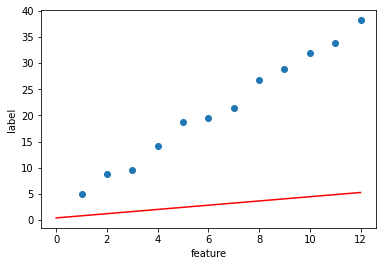

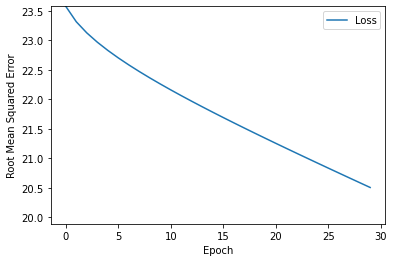

In [8]:
my_model = build_model(learning_rate)
trained_weights, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weights, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)